# Imports

In [1]:
import networkx
import math
import scipy.optimize
import numpy
import sys
from scipy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
import pywt
import scipy.fftpack
import random
import operator
import copy
from collections import deque
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from matplotlib.lines import Line2D

from lib.io import *
from lib.vis import *
from lib.graph_signal_proc import *
from lib.netpros import *
from lib.syn import *

# Datasets

## Small traffic

In [2]:
small_traffic = {}
small_traffic["path"] = "/home/arlei/Phd/research/network_process/data/small_traffic/"
small_traffic["num_snaps"]=8640

## Large traffic

In [ ]:
traffic = {}
traffic["path"] = "/home/arlei/Phd/research/network-process/data/traffic/"
traffic["num_snaps"]=8640

## Facebook

User activity (send/receive message) on facebook
#vertices: 63392
#snapshots: 
sampling rate: 1 week

## Brain

In [ ]:
#TODO

# Cascade on Karate Club Dataset

In [ ]:
G=networkx.karate_club_graph()
syn_F = generate_dyn_cascade(G, 4, 4, 4)

In [ ]:
set_f(G, syn_F[0])

draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate_1.svg

from IPython.display import SVG

SVG(filename='karate_1.svg')

# Heat on Karate Club Dataset

In [ ]:
set_f(G, syn_F[0])

draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate_1.svg

from IPython.display import SVG

SVG(filename='karate_1.svg')

In [ ]:
set_f(G, syn_F[1])

draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate_1.svg

from IPython.display import SVG

SVG(filename='karate_1.svg')

In [ ]:
set_f(G, syn_F[2])

draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate_1.svg

from IPython.display import SVG

SVG(filename='karate_1.svg')

In [ ]:
set_f(G, syn_F[3])

draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate_1.svg

from IPython.display import SVG

SVG(filename='karate_1.svg')

In [ ]:
set_f(G, syn_F[4])

draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate_1.svg

from IPython.display import SVG

SVG(filename='karate_1.svg')

# Small traffic

In [ ]:
#G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")

#FT = read_dyn_graph(small_traffic["path"] + "traffic", 2000, G)   

In [ ]:
#plt.clf()
#heatmap = plt.pcolor(numpy.real(FT))
#plt.ylim(0,2000)
#plt.colorbar(heatmap)
#plt.savefig("fourier_time_graph.png")
#Image(filename='fourier_time_graph.png')

# Compression experiments

In [ ]:
def compression_experiment(G, FT, algs):
    comp_ratios = (.05, .10, .15, .20, .25, 0.30)

    results = {}
    for alg in algs:
        results[alg.name()] = []
        
        for i in range(len(FT)):
            results[alg.name()].append([])
            alg.set_graph(G)
            tr = alg.transform(FT[i])
            
            for r in comp_ratios:
                size = int(FT[i].size * r)
                appx_tr = alg.drop_frequency(tr, size)
                appx_FT = alg.inverse(appx_tr)
                
                results[alg.name()][i].append([L2(FT[i], appx_FT), L1(FT[i], appx_FT)])
            
        results[alg.name()] = numpy.array(results[alg.name()]) 
        
        results[alg.name()] = numpy.mean(results[alg.name()], axis=0)
                               
    return results

In [ ]:
def plot_compression_experiments(results, output_file_name):
    comp_ratios = (.05, .10, .15, .20, .25, .30)
    plt.clf()
    ax = plt.subplot(111)
    i = 5
    for alg in results.keys():
        ax.semilogy(comp_ratios, results[alg][:,0], label=alg, marker=list(Line2D.markers.keys())[i], markersize=10, basey=2)
        i = i + 1

        #plt.loglog(comp_ratios, results[alg][:,0], basex=2, basey=2, label=alg)
        
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_ylabel('L2 error', fontsize=20)
    ax.set_xlabel('size', fontsize=20)
    ax.set_ylim([math.pow(2,-6), 2])
    ax.set_xlim([0,.35])
    box = ax.get_position()
    plt.rcParams['xtick.labelsize'] = 10 
    plt.rcParams['ytick.labelsize'] = 10
    ax.set_position([box.x0, box.y0, box.width * 0.65, box.height])
            
    plt.savefig(output_file_name)

## Gaussian noise

In [ ]:
G=networkx.karate_club_graph()
syn_Fs = []

for i in range(10):
    syn_F = generate_dyn_gaussian_noise(G, 30)
    syn_Fs.append(syn_F)
    
algs = [SVD(), TwoDHWavelets(), TwoDFourier(), TwoDGWavelets(), TwoDGNCWavelets()]
reskn = compression_experiment(G, syn_Fs, algs)

In [ ]:
plot_compression_experiments(reskn, "karate_compression_gaussian_noise_l2.png")
Image(filename="karate_compression_gaussian_noise_l2.png")

In [ ]:
plt.clf()
heatmap = plt.pcolor(syn_F)
plt.colorbar(heatmap)
plt.savefig("karate_gaussian.png")
Image(filename='karate_gaussian.png')

## Independent Cascade

In [ ]:
G=networkx.karate_club_graph()

syn_Fs = []

for i in range(1):
    syn_F = generate_dyn_indep_cascade(G, 5, 0.5)
    syn_Fs.append(syn_F)
    
algs = [SVD(), TwoDHWavelets(), TwoDFourier(), TwoDGNCWavelets()]
resks = compression_experiment(G, syn_Fs, algs)

In [ ]:
plot_compression_experiments(resks, "karate_compression_gaussian_sync_smooth_noise_l2.png")
Image(filename="karate_compression_gaussian_sync_smooth_noise_l2.png")

In [ ]:
plt.clf()
heatmap = plt.pcolor(syn_Fs[0])
plt.colorbar(heatmap)
plt.savefig("karate_sync_smooth_gaussian.png")
Image(filename='karate_sync_smooth_gaussian.png')

## Synchronized Bursts

In [ ]:
G=networkx.karate_club_graph()
syn_Fs = []

for i in range(10):
    syn_F = generate_dyn_bursty_noise(G, 60)
    syn_Fs.append(syn_F)
    
algs = [SVD(), TwoDHWavelets(), TwoDFourier(), TwoDGWavelets(), TwoDGNCWavelets()]
reskb = compression_experiment(G, syn_Fs, algs)

In [ ]:
plot_compression_experiments(reskb, "karate_compression_bursty_noise_l2.png")
Image(filename="karate_compression_bursty_noise_l2.png")

In [ ]:
plt.clf()
heatmap = plt.pcolor(syn_F)
plt.colorbar(heatmap)
plt.savefig("karate_sync_bursty.png")
Image(filename='karate_sync_bursty.png')

## Karate club - Heat

In [ ]:
G=networkx.karate_club_graph()
syn_Fs = []

for i in range(50):
    syn_F = generate_dyn_heat(G, 8, 1, 2)
    syn_Fs.append(syn_F)
    
algs = [SVD(), TwoDHWavelets(), TwoDFourier(), TwoDGWavelets(), TwoDGNCWavelets()]
reskh = compression_experiment(G, syn_Fs, algs)

In [ ]:
plot_compression_experiments(reskh, "karate_compression_heat_l2.png")
Image(filename="karate_compression_heat_l2.png")

## Karate club - Cascade

In [ ]:
G=networkx.karate_club_graph()
syn_Fs = []

for i in range(50):
    syn_F = generate_dyn_cascade(G, 10, 8, 2)
    syn_Fs.append(syn_F)
    
algs = [SVD(), TwoDHWavelets(), TwoDFourier(), TwoDGWavelets(), TwoDGNCWavelets()]  
reskc = compression_experiment(G, syn_Fs, algs)

In [ ]:
plot_compression_experiments(reskc, "karate_compression_cascade_l2.png")
Image(filename="karate_compression_cascade_l2.png")

## Small Traffic

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")

FT = read_dyn_graph(small_traffic["path"] + "traffic", 2000, G)  

In [ ]:
algs = [SVD(), TwoDHWavelets(), TwoDFourier(), TwoDGNCWavelets()]

restf = compression_experiment(G, [cFT], algs)

In [ ]:
plot_compression_experiments(restf, "traffic_compression_l2.png")

In [ ]:
Image(filename="traffic_compression_l2.png")

# Visualizing Coefficients

## Karate club

In [ ]:
G=networkx.karate_club_graph()
syn_F = generate_dyn_syn(G, 4, 8, 2)

In [ ]:
plt.clf()
heatmap = plt.pcolor(numpy.real(syn_F))
plt.colorbar(heatmap)
plt.savefig("karate_heat.png")
Image(filename='karate_heat.png')

In [ ]:
ft = TwoDFourier()
ft.set_graph(G)
fft = ft.transform(syn_F)

In [ ]:
plt.clf()
heatmap = plt.pcolor(ft.scale_energy_info(fft))
plt.colorbar(heatmap)
plt.savefig("karate_heat.png")
Image(filename='karate_heat.png')

In [ ]:
wt = TwoDGWavelets()
wt.set_graph(G)
wtt = wt.transform(syn_F)

In [ ]:
plt.clf()
heatmap = plt.pcolor(wt.scale_energy_info(wtt))
plt.colorbar(heatmap)
plt.savefig("karate_heat.png")
Image(filename='karate_heat.png')

In [ ]:
wt = TwoDHWavelets()
wt.set_graph(G)
wtt = wt.transform(syn_F)

In [ ]:
plt.clf()
heatmap = plt.pcolor(wt.scale_energy_info(wtt)[:170])
plt.colorbar(heatmap)
plt.yticks(list(range(0, 170, 34)))
plt.savefig("karate_heat.png")
Image(filename='karate_heat.png')

## Traffic

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")

FT = read_dyn_graph(small_traffic["path"] + "traffic", 2000, G)  

In [ ]:
plt.clf()
heatmap = plt.pcolor(numpy.real(FT))
plt.colorbar(heatmap)
plt.savefig("traffic_heat.png")
Image(filename='traffic_heat.png')

In [ ]:
ft = TwoDFourier()
ft.set_graph(G)
ftt = ft.transform(FT)

In [ ]:
plt.clf()
heatmap = plt.pcolor(numpy.absolute(ft.scale_energy_info(ftt)[:50].transpose()[:50]))
plt.colorbar(heatmap)
plt.savefig("traffic_heat.png")
Image(filename='traffic_heat.png')

In [ ]:
wt = TwoDGWavelets()
wt.set_graph(G)
wtt = wt.transform(FT)

In [ ]:
plt.clf()
heatmap = plt.pcolor(numpy.absolute(wt.scale_energy_info(wtt)[:50].transpose()[:50]))
plt.colorbar(heatmap)
plt.savefig("traffic_heat.png")
Image(filename='traffic_heat.png')

In [ ]:
list(range(0,100,10))

In [ ]:
%aimport

In [ ]:
print (reskh)

In [ ]:
print(list(Line2D.markers.keys()))

In [ ]:
tree, ind = normalized_cut_hierarchy(G)

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")

A = networkx.adjacency_matrix(G)
spectral = SpectralClustering(n_clusters=5, affinity='precomputed')
f = spectral.fit(A)
C = spectral.fit_predict(A)

In [ ]:
Gc = max(networkx.connected_component_subgraphs(G), key=len)
print (Gc.edges())

In [ ]:
A = networkx.adjacency_matrix(G)
spectral = SpectralClustering(n_clusters=2, affinity='precomputed')
f = spectral.fit(A)
C = spectral.fit_predict(A)

In [ ]:
set_f(G, C)
draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate_1.svg

from IPython.display import SVG

SVG(filename='karate_1.svg')

In [ ]:
import statsmodels.api as sm
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)

In [ ]:
import pandas as pd
from datetime import datetime, date, time, timedelta
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G)
start_time = datetime.strptime("1/04/11 00:00", "%d/%m/%y %H:%M")
data = pd.DataFrame(FT[:,0], pd.DatetimeIndex(start='1/04/11 00:00',
                                                 periods=len(FT[:,0]),
                                                 freq='5min'))

In [ ]:
data.interpolate(inplace=True)

In [ ]:
res = sm.tsa.seasonal_decompose(data.values, freq=2016)

In [ ]:
resplot = res.plot()
plt.show()

In [ ]:
numpy.nan_to_num(res.trend)+numpy.nan_to_num(res.res)

In [ ]:
print (sm.datasets.co2.load_pandas().data)

In [3]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G)
cFT = clean_traffic_data(FT)

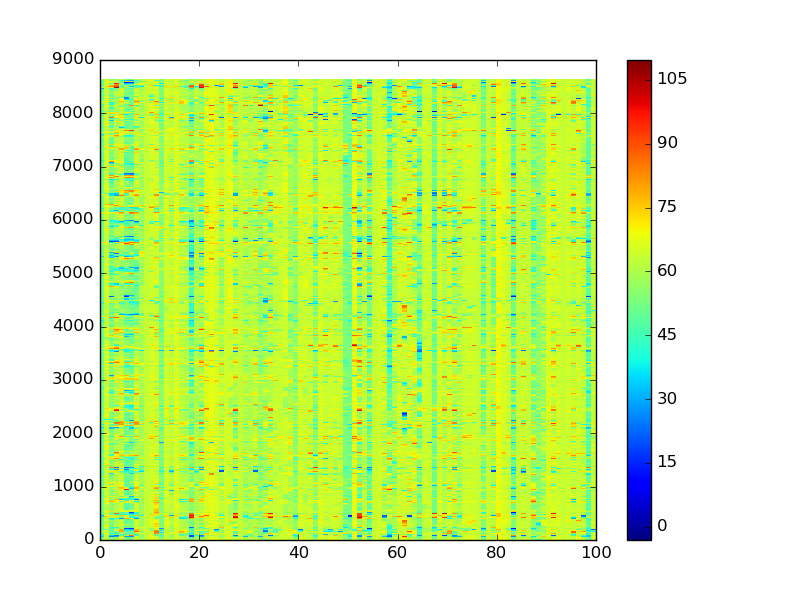

In [4]:
plt.clf()
heatmap = plt.pcolor(cFT)
plt.colorbar(heatmap)
plt.savefig("traffic_heat.png")
Image(filename='traffic_heat.png')

In [ ]:
plt.clf()
heatmap = plt.pcolor(numpy.real(FT))
plt.colorbar(heatmap)
plt.savefig("traffic_heat.png")
Image(filename='traffic_heat.png')